In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import spearmanr, pearsonr

In [9]:
df_path = '/content/drive/MyDrive/STAT/AMZN_Clean.csv'
amazon_df = pd.read_csv(df_path, parse_dates=['Date'])
amazon_df['Date'] = amazon_df['Date'].dt.tz_localize(None)  # Remove timezone info
amazon_df.set_index('Date', inplace=True)
amazon_df

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2019-01-02,0,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
2019-01-03,1,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2019-01-04,2,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
2019-01-07,3,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
2019-01-08,4,82.829002,82.829002,83.830498,80.830498,83.234497,177628000
...,...,...,...,...,...,...,...
2023-12-22,1253,153.419998,153.419998,154.350006,152.710007,153.770004,29480100
2023-12-26,1254,153.410004,153.410004,153.979996,153.029999,153.559998,25067200
2023-12-27,1255,153.339996,153.339996,154.779999,153.119995,153.559998,31434700


In [4]:
covid_df_path = '/content/drive/MyDrive/STAT/sum_confirmed.csv'
covid_df = pd.read_csv(covid_df_path, parse_dates=['Date'])
covid_df.set_index('Date', inplace=True)
covid_df

,Case
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2022-04-12,80477797
2022-04-13,80514639
2022-04-14,80573532


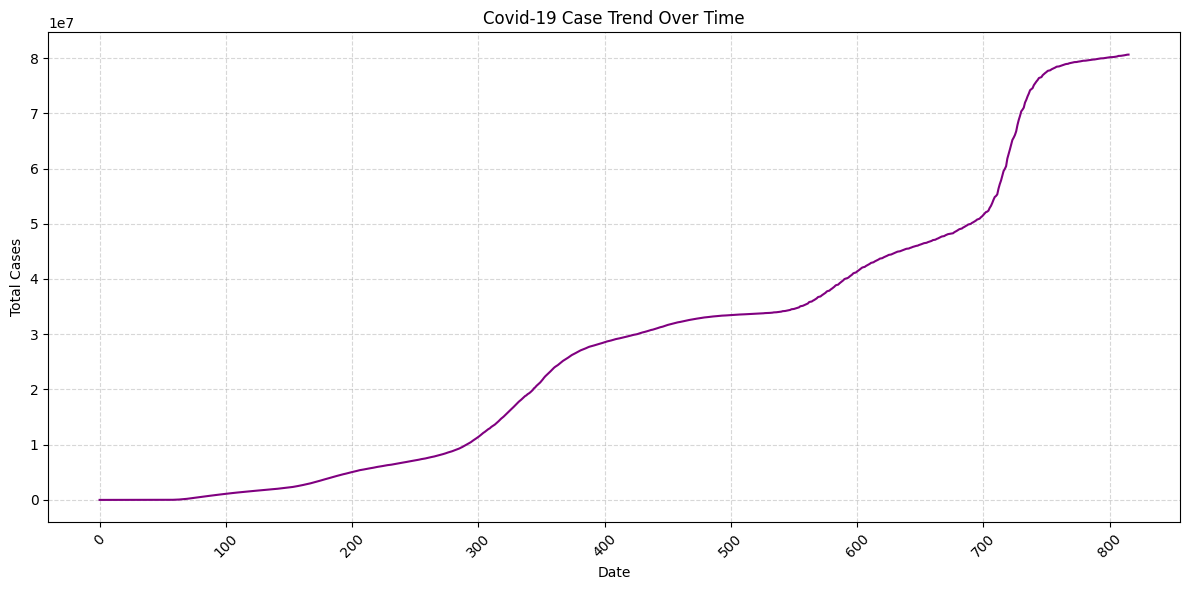

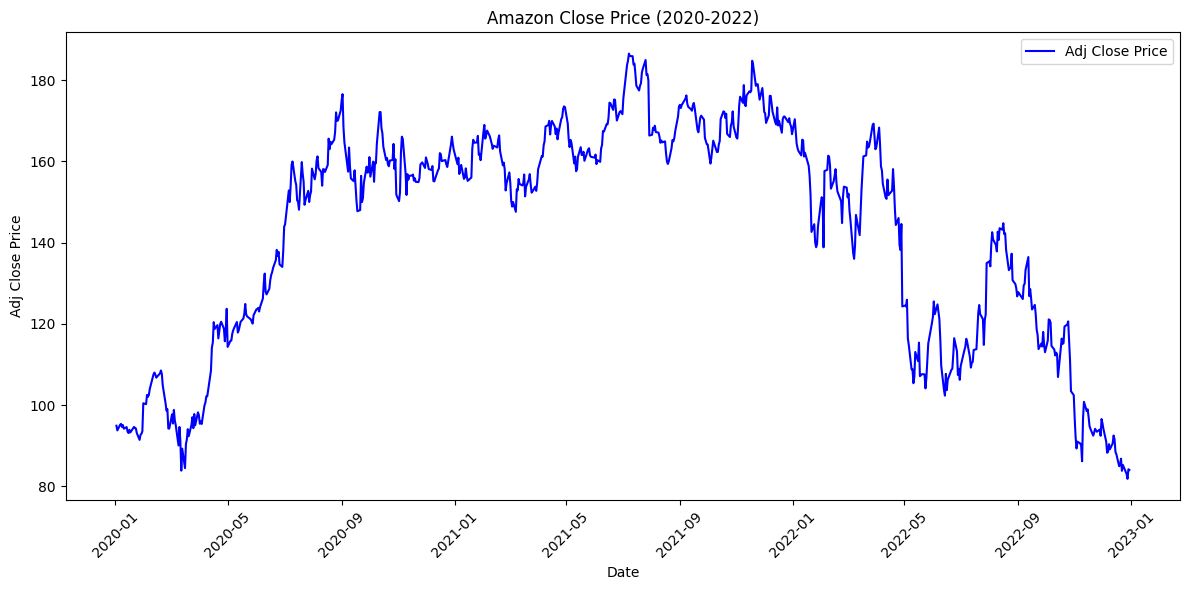

In [10]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(covid_df.index, covid_df["Case"], color="purple", linewidth=1.5)
plt.title("Covid-19 Case Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

df_filtered = amazon_df[(amazon_df.index >= '2020-01-01') & (amazon_df.index <= '2022-12-31')]

# Plot the Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], color='blue', label='Adj Close Price')
plt.title('Amazon Close Price (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyze the relationship between Amazon's stock price (Close) and COVID-19 total cases by calculating two types of correlations: Pearson and Spearman

### 1. Pearson Correlation
- Purpose: Pearson correlation measures the linear relationship between Amazon's stock price and COVID-19 total cases.
- Value close to 1: Strong positive linear correlation, meaning as COVID-19 cases increase, Amazon's stock price tends to increase as well.
- Value close to -1: Strong negative linear correlation, meaning as COVID-19 cases increase, Amazon's stock price tends to decrease.
Value close to 0: No linear relationship between COVID-19 cases and Amazon's stock price.
- p-value: Indicates the statistical significance of the correlation. A p-value below 0.05 generally suggests that the observed correlation is statistically significant, meaning the relationship is unlikely to be due to random chance.

### 2. Spearman Correlation
- Purpose: Spearman correlation measures the monotonic relationship between Amazon's stock price and COVID-19 total cases, which is useful if the relationship is not linear but still consistent in terms of rank ordering.
- Value close to 1: Strong positive monotonic relationship, indicating that as COVID-19 cases increase, Amazon's stock price generally ranks higher.
- Value close to -1: Strong negative monotonic relationship, meaning as COVID-19 cases increase, Amazon's stock price generally ranks lower.
Value close to 0: No monotonic relationship between the two variables.
- p-value: Similar to the Pearson test, a p-value below 0.05 indicates that the correlation is statistically significant.

In [6]:

amazon_df = pd.read_csv('/content/drive/MyDrive/STAT/AMZN_Clean.csv')
covid_df = pd.read_csv('/content/drive/MyDrive/STAT/sum_confirmed.csv')

# Convert 'Date' columns to datetime and set as index if needed
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
amazon_df['Date'] = amazon_df['Date'].dt.tz_localize(None)

# Merge both dataframes on 'Date' to ensure alignment
merged_df = pd.merge(amazon_df[['Date', 'Close']], covid_df[['Date', 'Case']], on='Date')

# Drop any rows with missing values (if dates don’t align perfectly)
merged_df.dropna(inplace=True)

# Calculate Pearson correlation
pearson_corr, pearson_p_value = pearsonr(merged_df['Close'], merged_df['Case'])

# Calculate Spearman correlation
spearman_corr, spearman_p_value = spearmanr(merged_df['Close'], merged_df['Case'])

# Print results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: 0.503151381559179, p-value: 1.5836894091050372e-37
Spearman Correlation: 0.6091968423040387, p-value: 1.3747354268484754e-58


### Interpretation of Results

1. **Pearson Correlation Coefficient: 0.503**
   - This indicates a **moderate positive linear relationship** between Amazon’s stock price and COVID-19 total cases.
   - As COVID-19 cases increased, Amazon’s stock price tended to increase as well, though the relationship is not very strong.

2. **Pearson p-value: 1.58e-37**
   - The very low p-value suggests that the correlation is statistically significant, meaning the observed relationship is unlikely to be due to random chance.

3. **Spearman Correlation Coefficient: 0.609**
   - This indicates a **strong positive monotonic relationship** between Amazon’s stock price and COVID-19 total cases.
   - The strong monotonic correlation suggests that as COVID-19 cases rose, Amazon’s stock price generally ranked higher, reflecting a positive trend.

4. **Spearman p-value: 1.37e-58**
   - This very low p-value confirms that the positive relationship is statistically significant.

### Summary of Insights
- Both Pearson and Spearman correlations show a statistically significant positive relationship between COVID-19 cases and Amazon's stock price.
- This suggests that Amazon's stock price generally increased as COVID-19 cases rose, possibly due to increased online shopping demand during the pandemic.

### Practical Implications
- **Investment Insight**: Investors might view Amazon as resilient during global health crises, given its strong performance during the pandemic.
- **Business Perspective**: This trend aligns with the idea that Amazon benefited from changes in consumer behavior during the pandemic.
- **Caution on Causation**: While there is a strong positive correlation, correlation does not imply causation. Other factors could also impact Amazon's stock price, such as market trends and consumer confidence.

In conclusion, the positive and statistically significant correlation between Amazon’s stock price and COVID-19 cases highlights the potential influence of pandemic-driven demand on Amazon's performance.


In [7]:
amazon_df = pd.read_csv('/content/drive/MyDrive/STAT/AMZN_Clean.csv')
covid_df = pd.read_csv('/content/drive/MyDrive/STAT/sum_confirmed.csv')

# Convert 'Date' columns to datetime and merge on 'Date'
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
amazon_df['Date'] = amazon_df['Date'].dt.tz_localize(None)
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
merged_df = pd.merge(amazon_df[['Date', 'Close']], covid_df[['Date', 'Case']], on='Date')
merged_df.dropna(inplace=True)

# Define high and low COVID-19 case groups based on the median
median_case = merged_df['Case'].median()
low_case_group = merged_df[merged_df['Case'] < median_case]['Close']
high_case_group = merged_df[merged_df['Case'] >= median_case]['Close']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(low_case_group, high_case_group)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the average Amazon stock price between low and high COVID-19 case periods.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average Amazon stock price between low and high COVID-19 case periods.")


T-statistic: -15.212670911507834
P-value: 5.09651623132961e-44
Reject the null hypothesis. There is a significant difference in the average Amazon stock price between low and high COVID-19 case periods.


### Analysis of T-test Results

**T-statistic**: -15.21  
**P-value**: 5.10e-44  

**Decision**: Reject the null hypothesis.

---

#### Interpretation of Results

1. **Significance of the Results**:
   - The **p-value** is extremely small, much less than the typical significance level of 0.05, indicating that the observed difference in Amazon's stock price between periods of low and high COVID-19 case counts is statistically significant.
   - The **T-statistic** of -15.21 is a large negative value, which indicates a substantial difference between the two groups (low vs. high COVID-19 case periods). The negative sign here shows the direction of the difference, suggesting that the mean Amazon stock price was lower during high COVID-19 case periods.

2. **Rejecting the Null Hypothesis**:
   - Since the null hypothesis posited no difference between the two groups, and we have rejected it, we conclude that there is a statistically significant difference in Amazon's average stock price between periods of high and low COVID-19 cases.
   - This outcome suggests that the COVID-19 pandemic, specifically periods of high case counts, had a meaningful impact on Amazon's stock price.

3. **Practical Implications**:
   - The significant difference could imply that Amazon's stock price behaved differently based on the pandemic's intensity:
     - **High COVID-19 Cases**: The negative T-statistic suggests that Amazon's stock price was generally lower during periods with high COVID-19 case counts.
     - **Low COVID-19 Cases**: During periods with lower COVID-19 cases, Amazon’s stock price might have been comparatively higher.
   - This could be due to factors such as market concerns during high COVID-19 periods, potential shifts in consumer spending, or changes in investor sentiment around Amazon’s growth trajectory during severe pandemic phases.

4. **Possible Explanations**:
   - **Consumer Behavior**: High COVID-19 cases may have initially increased demand for Amazon services, but over time, the pandemic's economic impact (e.g., inflation, unemployment) might have affected consumer spending patterns, contributing to stock price volatility.
   - **Market Sentiment**: During periods of high COVID-19 cases, investor sentiment may have been more cautious or volatile, impacting stock prices. This could be due to concerns about long-term economic uncertainty or shifts in consumer habits post-pandemic.

5. **Further Analysis**:
   - While the t-test provides insight into mean differences, it could be beneficial to look at other variables or factors alongside COVID-19 case counts, such as quarterly earnings reports or external economic indicators, to see if other factors contributed to this observed difference in stock price.

---

#### Conclusion

The significant difference between Amazon’s stock prices during high and low COVID-19 case periods implies that the pandemic influenced the stock’s performance. This suggests that investors and stakeholders likely responded differently to the stock during periods of increased COVID-19 cases, potentially reflecting economic uncertainties or changes in consumer and investor behavior related to pandemic conditions.
